Carregando os dados


In [ ]:
caminho_dados = "/content/drive/MyDrive/Python/2023_Viagem.csv"

In [ ]:
 import pandas as pd

pd.set_option('display.float_format','{:.2f}'.format)
pd.set_option('display.max_columns', None)


# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep= ";", decimal= ",")

# Criando Colunas de despesas
df_viagens['Despesas'] = + df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NAO INDENTIFICADO')

# Convertendo colunas de datas
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"],format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"],format="%d/%m/%Y")

# Criando novas colunas de datas
df_viagens["Mês da viagem"] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens["Dias de viagem"] = (df_viagens["Período - Data de fim"] - df_viagens['Período - Data de início']).dt.days

In [ ]:
# Criando tabela consolidada

df_viagens_consolidado = (df_viagens.
 groupby("Cargo").
 agg(
     despesa_media=("Despesas","mean"),
     duracao_media=("Dias de viagem", "mean"),
     despesas_totais=("Despesas",'sum'),
     destino_mais_frequente=("Destinos", pd.Series.mode),
     n_viagens=("Nome", "count"))
     .reset_index()
     .sort_values(by="despesas_totais", ascending=False)

)

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, "Cargo"]
filtro = df_viagens_consolidado["Cargo"].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

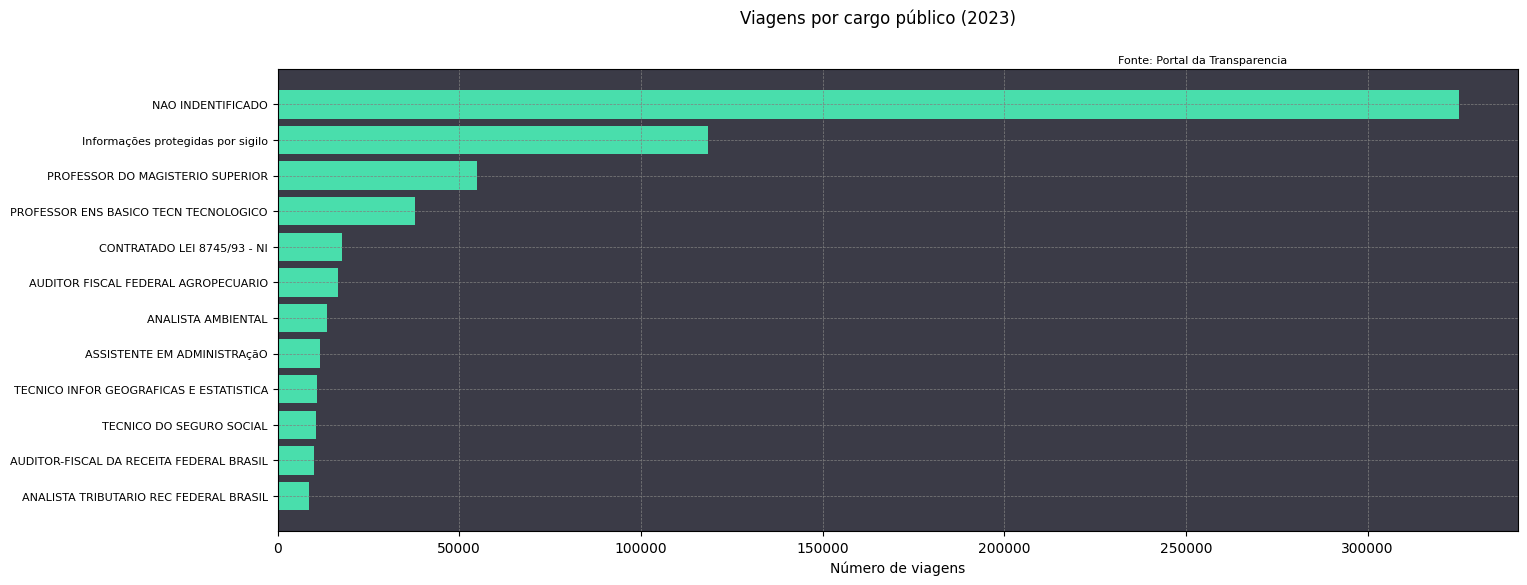

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,6))

ax.barh(df_final['Cargo'], df_final['n_viagens'], color="#49deac")
ax.invert_yaxis()
ax.set_facecolor('#3b3b47')


fig.suptitle('Viagens por cargo público (2023)')

plt.figtext(0.65, 0.89,'Fonte: Portal da Transparencia', fontsize=8)

plt.grid(color='gray', linestyle= '--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de viagens')

plt.show()

In [1]:
# Conclusão
# A análise realizada permitiu identificar os cargos públicos responsáveis pelo maior número de viagens ao longo de 2023,
# bem como seus respectivos gastos médios, duração das viagens e destinos mais recorrentes. A consolidação dos dados revelou padrões importantes,
# como a concentração de despesas em determinados cargos e a recorrência de viagens para os mesmos destinos.
# com base nesses achados, é possível levantar questionamentos sobre a eficiência e a necessidade das viagens realizadas, além de destacar eventuais excessos ou discrepâncias entre cargos.
# A filtragem aplicada, considerando apenas os cargos com participação relevante no total de viagens,
# Contribuiu para uma visão mais clara e focada nos principais responsáveis pelos gastos com deslocamentos.